# Loading DB

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X.shape

(1797, 64)

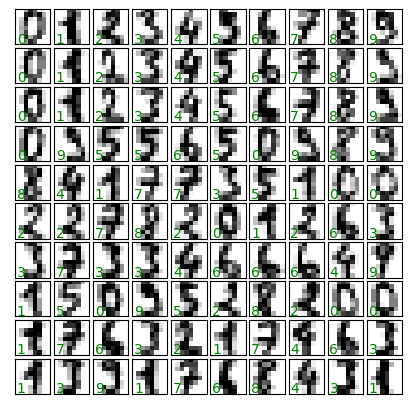

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

Importing the data

In [9]:
import json

# Assuming your JSON file is named 'data.json'
file_path = 'data.json'

# Load the JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

# Access the data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Convert lists to NumPy arrays
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

# Now you can use X_train, y_train, X_test, y_test as needed
# Example:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

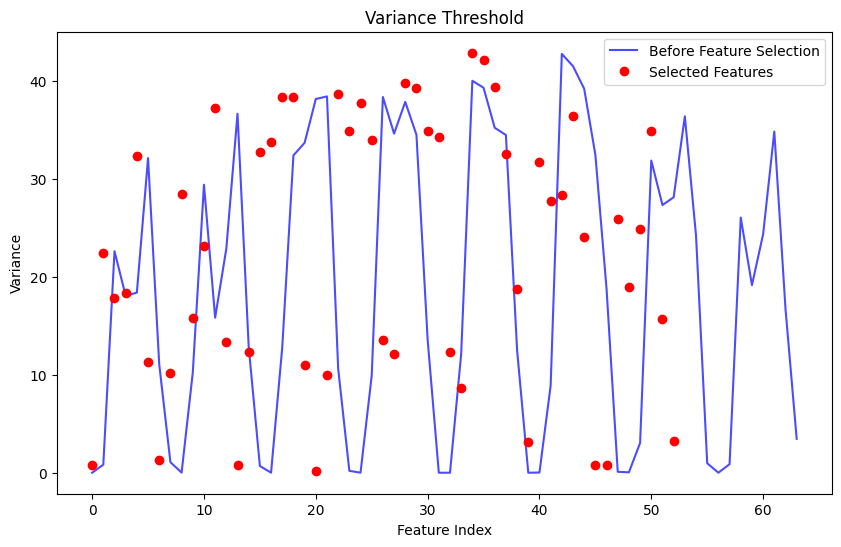

Number of selected features (VarianceThreshold): 53


In [11]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X_train)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

# Feature Extraction

In [12]:
from sklearn.decomposition import PCA

## P = 0.8

[2,5,7,9,10,12,15,20,30]

In [13]:
pca = PCA(n_components = 2)
X_fe_2 = pca.fit_transform(X_fs_p80)
X_fe_2.shape

(1257, 2)

In [14]:
pca = PCA(n_components = 5)
X_fe_5 = pca.fit_transform(X_fs_p80)
X_fe_5.shape

(1257, 5)

In [15]:
pca = PCA(n_components = 7)
X_fe_7 = pca.fit_transform(X_fs_p80)
X_fe_7.shape

(1257, 7)

In [16]:
pca = PCA(n_components = 9)
X_fe_9 = pca.fit_transform(X_fs_p80)
X_fe_9.shape

(1257, 9)

In [17]:
pca = PCA(n_components = 10)
X_fe_10 = pca.fit_transform(X_fs_p80)
X_fe_10.shape

(1257, 10)

In [18]:
pca = PCA(n_components = 12)
X_fe_12 = pca.fit_transform(X_fs_p80)
X_fe_12.shape

(1257, 12)

In [19]:
pca = PCA(n_components = 15)
X_fe_15 = pca.fit_transform(X_fs_p80)
X_fe_15.shape

(1257, 15)

In [20]:
pca = PCA(n_components = 20)
X_fe_20 = pca.fit_transform(X_fs_p80)
X_fe_20.shape

(1257, 20)

In [21]:
pca = PCA(n_components = 30)
X_fe_30 = pca.fit_transform(X_fs_p80)
X_fe_30.shape

(1257, 30)

# Model

In [22]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Define list of numbers of components for PCA
num_components_list = [2, 5, 7, 9, 10, 12, 15, 20, 30]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_fs = sel.fit_transform(X)


## Default parameters

0.6365890751086283
0.825788330229671
0.8558535071384232
0.8909342023587834
0.8959342023587835
0.9014928615766605
0.9054096834264431
0.9087368094351334
0.9093016759776535


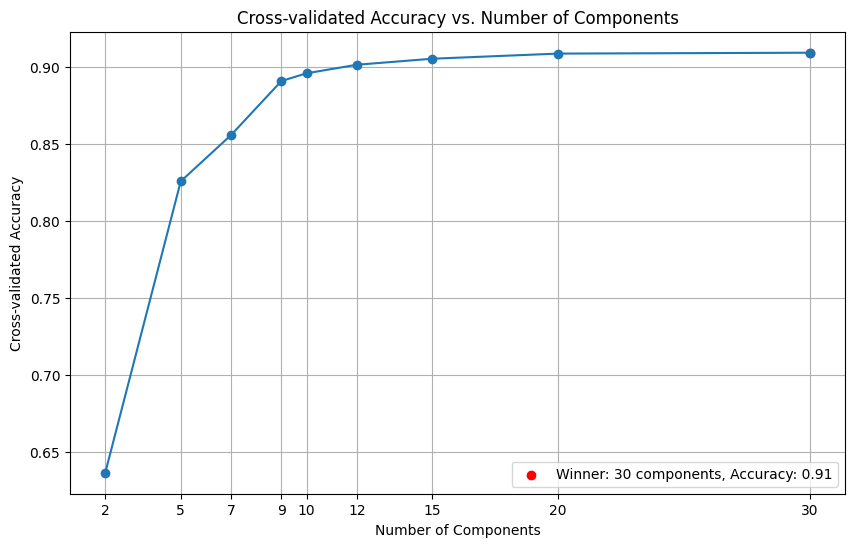

In [49]:

# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Store accuracies
accuracies = []


# Perform 10-fold cross-validation for each number of components
for num_components in num_components_list:
    # Feature extraction using PCA
    pca = PCA(n_components=num_components)
    X_fe = pca.fit_transform(X_train_fs)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_fe, y, cv=10)
    
    # Average cross-validation score
    avg_accuracy = np.mean(cv_scores)
    accuracies.append(avg_accuracy)

# Find the index of the maximum accuracy
winner_index = np.argmax(accuracies)

# Get the number of components corresponding to the winner
winning_components = num_components_list[winner_index]

# Get the highest accuracy
highest_accuracy = accuracies[winner_index]

for accuarcy in accuracies:
    print(accuarcy)

# Plot the winning result
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracies, marker='o', linestyle='-')
plt.scatter(winning_components, highest_accuracy, color='red', label=f'Winner: {winning_components} components, Accuracy: {highest_accuracy:.2f}')
plt.title('Cross-validated Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cross-validated Accuracy')
plt.xticks(num_components_list)
plt.grid(True)
plt.legend()
plt.show()


## Random parameters priors

Winning Priors:
Prior 1 ([0.24327453 0.19527221 0.00439702 0.26173521 0.01463472 0.04674354
 0.05690132 0.01899543 0.07000087 0.08804516]):
 Num Features: 30, Accuracy: 0.8965
Prior 2 ([0.00542459 0.02904343 0.03056856 0.03983009 0.15543971 0.11525376
 0.00116288 0.11766563 0.24858133 0.25703003]):
 Num Features: 20, Accuracy: 0.8954
Prior 3 ([0.04690114 0.00244366 0.09508116 0.09061389 0.17857216 0.12071203
 0.23521531 0.03815384 0.0490759  0.14323092]):
 Num Features: 30, Accuracy: 0.9020
Prior 4 ([0.01690148 0.08757367 0.04366973 0.13003413 0.4045086  0.03269406
 0.07686832 0.1526646  0.02512372 0.02996169]):
 Num Features: 20, Accuracy: 0.9121
Prior 5 ([0.08295036 0.02761968 0.03593078 0.06440469 0.17143227 0.27991698
 0.11487701 0.15908685 0.01706652 0.04671484]):
 Num Features: 30, Accuracy: 0.9160
Prior 6 ([0.22314713 0.23489094 0.01892568 0.01770129 0.13974614 0.00719876
 0.04479784 0.25532308 0.05294324 0.0053259 ]):
 Num Features: 30, Accuracy: 0.8998
Prior 7 ([0.13260725 0.0

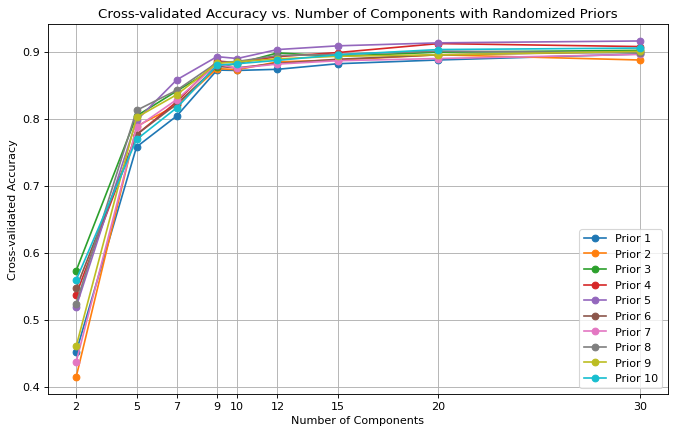

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Assuming you have defined num_components_list, X_train_fs, and y

# Initialize Gaussian Naive Bayes classifier with random priors
priors_list = []

# Generate 10 sets of random priors
for _ in range(10):
    priors = np.random.dirichlet(np.ones(10))
    priors_list.append(priors)

# Store accuracies and winners
accuracies_list = []
winners = []

# Perform 10-fold cross-validation for each prior
for priors in priors_list:
    # Store accuracies for this prior
    accuracies = []

    # Perform 10-fold cross-validation for each number of components
    for num_components in num_components_list:
        # Initialize Gaussian Naive Bayes classifier with current prior
        clf = GaussianNB(priors=priors)

        # Feature extraction using PCA
        pca = PCA(n_components=num_components)
        X_fe = pca.fit_transform(X_train_fs)

        # Perform 10-fold cross-validation
        cv_scores = cross_val_score(clf, X_fe, y, cv=10)

        # Average cross-validation score
        avg_accuracy = np.mean(cv_scores)
        accuracies.append(avg_accuracy)

    accuracies_list.append(accuracies)
    
    # Find the index of the maximum accuracy
    max_accuracy_index = np.argmax(accuracies)
    
    # Store the winning prior and its accuracy along with the corresponding number of components
    winners.append((priors, num_components_list[max_accuracy_index], accuracies[max_accuracy_index]))

# Print winners
print("Winning Priors:")
for i, (prior, num_components, accuracy) in enumerate(winners):
    print(f"Prior {i+1} ({prior}):\n Num Features: {num_components}, Accuracy: {accuracy:.4f}")

# Plot results for each prior
plt.figure(figsize=(10, 6), dpi=80)  # Adjust the resolution by changing dpi
for i, accuracies in enumerate(accuracies_list):
    plt.plot(num_components_list, accuracies, marker='o', linestyle='-', label=f'Prior {i+1}')
plt.title('Cross-validated Accuracy vs. Number of Components with Randomized Priors')
plt.xlabel('Number of Components')
plt.ylabel('Cross-validated Accuracy')
plt.xticks(num_components_list)
plt.legend()
plt.grid(True)
plt.show()


Winning var_smoothing Values:
Var Smoothing 1: 9.246721530394001e-06, Num Features: 30, Accuracy: 0.9087
Var Smoothing 2: 6.043287105067319e-06, Num Features: 30, Accuracy: 0.9099
Var Smoothing 3: 6.301053139421931e-06, Num Features: 30, Accuracy: 0.9093
Var Smoothing 4: 8.987401309174472e-06, Num Features: 30, Accuracy: 0.9093
Var Smoothing 5: 9.687461263725758e-06, Num Features: 30, Accuracy: 0.9099
Var Smoothing 6: 8.92149710827478e-06, Num Features: 30, Accuracy: 0.9099
Var Smoothing 7: 2.217693859502384e-06, Num Features: 20, Accuracy: 0.9110
Var Smoothing 8: 3.914144775873645e-06, Num Features: 30, Accuracy: 0.9099
Var Smoothing 9: 1.6644884372255795e-06, Num Features: 30, Accuracy: 0.9099
Var Smoothing 10: 7.800764271794705e-06, Num Features: 30, Accuracy: 0.9099


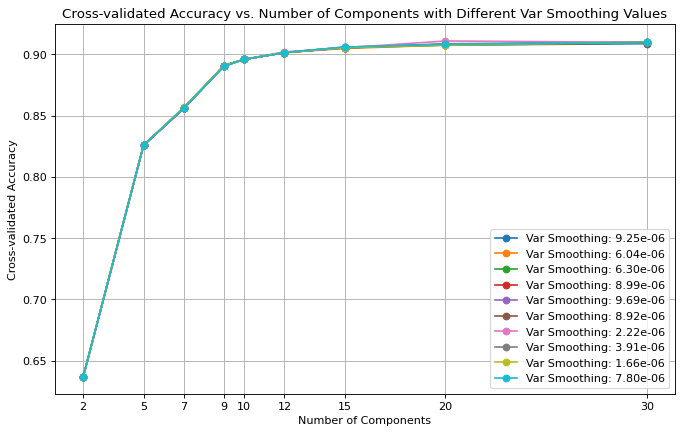

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Assuming you have defined num_components_list, X_train_fs, and y

# Define the range for random var_smoothing values
min_var_smoothing = 1e-10
max_var_smoothing = 1e-5

# Generate 10 random var_smoothing values within the specified range
var_smoothing_list = np.random.uniform(min_var_smoothing, max_var_smoothing, 10)

# Store accuracies and winners
accuracies_list = []
winners = []

# Perform 10-fold cross-validation for each var_smoothing value
for var_smoothing in var_smoothing_list:
    # Store accuracies for this var_smoothing value
    accuracies = []

    # Perform 10-fold cross-validation for each number of components
    for num_components in num_components_list:
        # Initialize Gaussian Naive Bayes classifier with current var_smoothing
        clf = GaussianNB(var_smoothing=var_smoothing)

        # Feature extraction using PCA
        pca = PCA(n_components=num_components)
        X_fe = pca.fit_transform(X_train_fs)

        # Perform 10-fold cross-validation
        cv_scores = cross_val_score(clf, X_fe, y, cv=10)

        # Average cross-validation score
        avg_accuracy = np.mean(cv_scores)
        accuracies.append(avg_accuracy)

    accuracies_list.append(accuracies)
    
    # Find the index of the maximum accuracy
    max_accuracy_index = np.argmax(accuracies)
    
    # Store the winning var_smoothing and its accuracy along with the corresponding number of components
    winners.append((var_smoothing, num_components_list[max_accuracy_index], accuracies[max_accuracy_index]))

# Print winners
print("Winning var_smoothing Values:")
for i, (var_smoothing, num_components, accuracy) in enumerate(winners):
    print(f"Var Smoothing {i+1}: {var_smoothing}, Num Features: {num_components}, Accuracy: {accuracy:.4f}")

# Plot results for each var_smoothing value
plt.figure(figsize=(10, 6), dpi=80)  # Adjust the resolution by changing dpi
for i, accuracies in enumerate(accuracies_list):
    plt.plot(num_components_list, accuracies, marker='o', linestyle='-', label=f'Var Smoothing: {var_smoothing_list[i]:.2e}')
plt.title('Cross-validated Accuracy vs. Number of Components with Different Var Smoothing Values')
plt.xlabel('Number of Components')
plt.ylabel('Cross-validated Accuracy')
plt.xticks(num_components_list)
plt.legend()
plt.grid(True)
plt.show()


In [51]:
priors=[0.08295036, 0.02761968, 0.03593078, 0.06440469, 0.17143227, 0.27991698, 0.11487701, 0.15908685, 0.01706652, 0.04671484]
var_smoothing = 2.217693859502384e-06
clf = GaussianNB(var_smoothing=var_smoothing, priors=priors)
pca = PCA(n_components=20)
X_fe = pca.fit_transform(X_train_fs)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X_fe, y, cv=10)

# Average cross-validation score
avg_accuracy = np.mean(cv_scores)
avg_accuracy

0.9120670391061452

In [57]:
priors=[0.08295036, 0.02761968, 0.03593078, 0.06440469, 0.17143227, 0.27991698, 0.11487701, 0.15908685, 0.01706652, 0.04671484]
var_smoothing = 2.217693859502384e-06
clf = GaussianNB(var_smoothing=var_smoothing, priors=priors)
pca = PCA(n_components=30)
X_fe = pca.fit_transform(X_train_fs)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X_fe, y, cv=10)

# Average cross-validation score
avg_accuracy = np.mean(cv_scores)
print(f'{avg_accuracy:.4f}')

0.9160


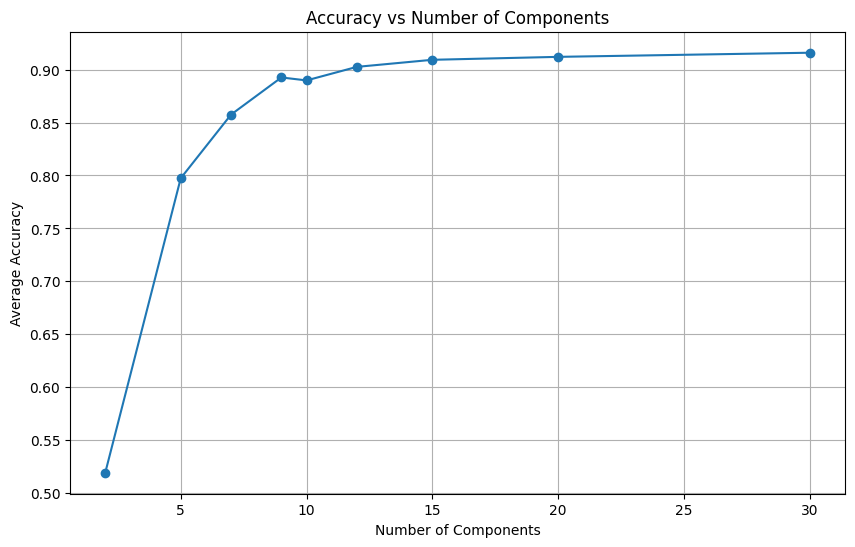

Best accuracy = 0.9159714463066418 Number of components:30


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Your priors and var_smoothing
priors = [0.08295036, 0.02761968, 0.03593078, 0.06440469, 0.17143227, 0.27991698, 0.11487701, 0.15908685, 0.01706652, 0.04671484]
var_smoothing = 2.217693859502384e-06
clf = GaussianNB(var_smoothing=var_smoothing, priors=priors)

# Initialize PCA and define the number of components list
pca = PCA()
num_components_list = [2, 5, 7, 9, 10, 12, 15, 20, 30]

# Initialize lists to store average accuracies for each number of components
avg_accuracies = []

# Loop through the number of components and perform cross-validation
for n_components in num_components_list:
    # Set the number of components for PCA
    pca.n_components = n_components
    # Transform the training data
    X_fe = pca.fit_transform(X_train_fs)
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_fe, y, cv=10)
    # Average cross-validation score
    avg_accuracy = np.mean(cv_scores)
    # Append the average accuracy to the list
    avg_accuracies.append(avg_accuracy)

# Plot the output accuracy
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, avg_accuracies, marker='o')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

best_accuracy = max(avg_accuracies)
component_num=num_components_list[avg_accuracies.index(best_accuracy)]

print(f'Best accuracy = {max(avg_accuracies)} Number of components:{component_num}')